In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

data = pd.read_csv('heart-disease-data.csv', header=None, names=column_names)

In [4]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

data['num'] = data['num'].apply(lambda x: 1 if x != 0 else 0)

In [5]:
print("First five rows of the dataset:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(data.head())

First five rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca thal  num
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0  6.0    0
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0  3.0    1
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0  7.0    1
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0  3.0    0
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0  3.0    0


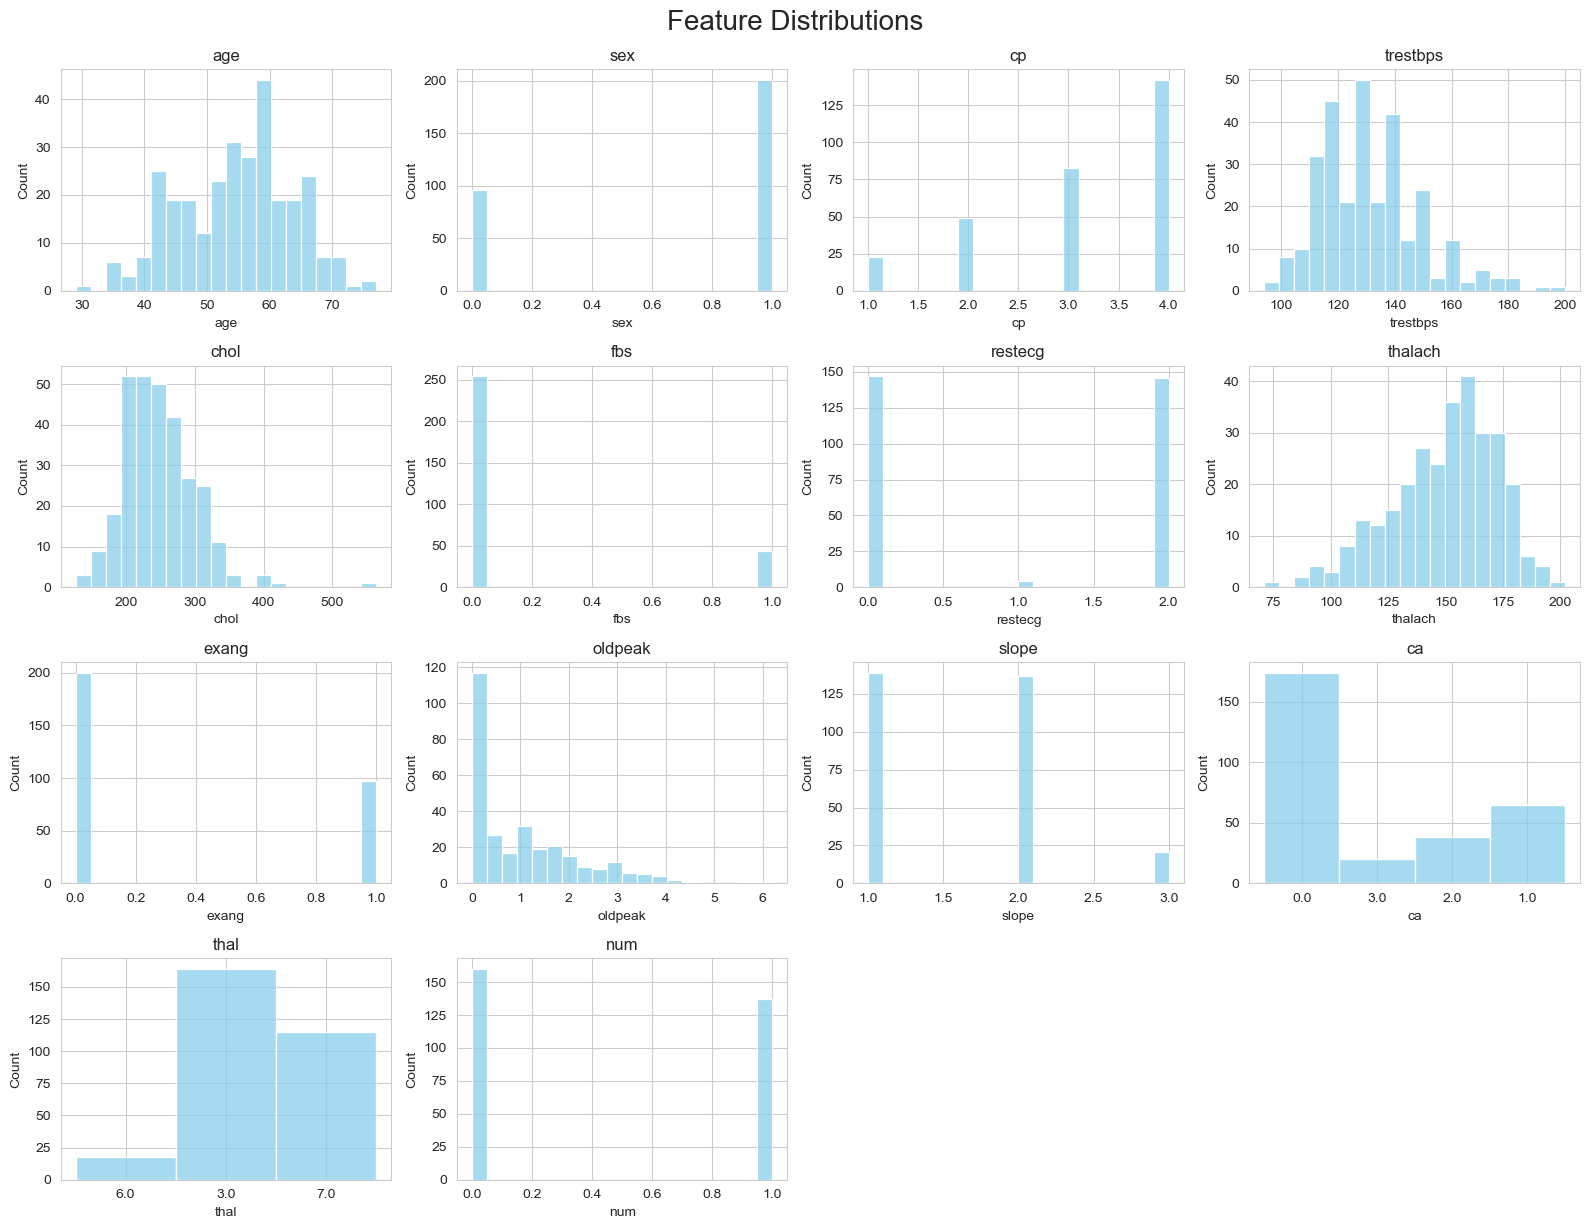

In [6]:
# Set a style and figure size
sns.set_style("whitegrid")
cols = 4
rows = (len(data.columns) + cols - 1) // cols

# Create subplots with dynamic row and column layout
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Flatten for easier iteration

# Plot each column's histogram
for ax, col in zip(axes, data.columns):
    sns.histplot(data[col], bins=20, color='skyblue', ax=ax)
    ax.set_title(f'{col}')

# Remove any extra subplots
for ax in axes[len(data.columns):]:
    ax.remove()

plt.tight_layout()
plt.suptitle('Feature Distributions', fontsize=20, y=1.02)  # Add a main title
plt.show()

In [7]:
# Prepare features and target
X = data.iloc[:, 0:13]  # Features
y = data['num']         # Target

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the SVM model
svm_model = SVC(kernel='linear', max_iter=10000)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Output results for SVM
print("SVM Model Results")
print(f"Test Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)

SVM Model Results
Test Accuracy: 0.88
Confusion Matrix:
 [[33  3]
 [ 4 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



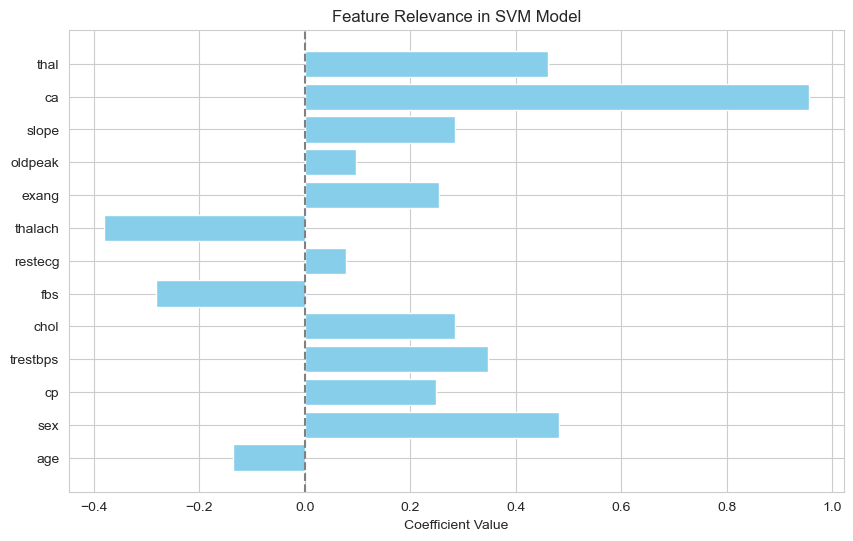

In [8]:
# Get feature names (assuming the data has been cleaned and structured as before)
feature_names = X.columns

# Extract feature coefficients from the SVM model
# For linear SVM, the coefficients are in svm_model.coef_
coefficients = svm_model.coef_.flatten()

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Relevance in SVM Model')
plt.axvline(0, color='gray', linestyle='--')  # Add a line at zero for reference
plt.show()

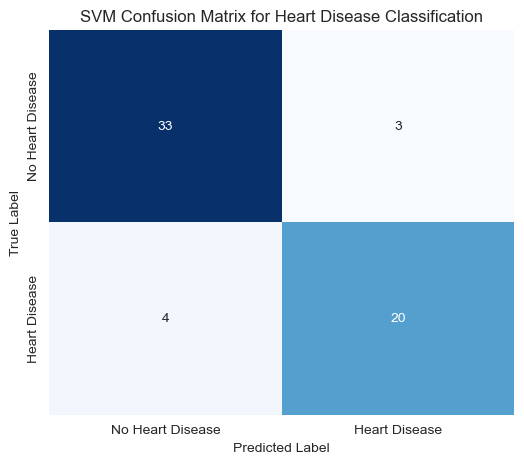

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('SVM Confusion Matrix for Heart Disease Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
def predict_heart_disease():
    # Prompt the user for patient information
    patient = input("Enter patient data (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):\n")
    
    # Split input string into a list of values and convert to floats
    try:
        patient_values = list(map(float, patient.split()))
    except ValueError:
        print("Invalid input. Please enter numeric values separated by spaces.")
        return

    # Check if the correct number of inputs were provided
    if len(patient_values) != 13:
        print(f"Expected 13 values, but received {len(patient_values)}. Please try again.")
        return

    # Scale the input using the previously fitted scaler
    patient_scaled = scaler.transform([patient_values])

    # Predict using the trained SVM model
    prediction = svm_model.predict(patient_scaled)

    # Output the prediction result
    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

# Call the function to make a prediction
predict_heart_disease()